In [ ]:
import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
from PIL import Image # type: ignore
from TextDetector import TextDetector  # Ajusta según el nombre real del archivo
import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
from PIL import Image # type: ignore

In [6]:
def plot_images_row(images, titles=None, figsize=(15, 5)):
    """
    Plotea una lista de imágenes en una sola fila.

    Args:
        images (list): Lista de imágenes (como arrays de NumPy o tensores convertidos a NumPy).
        titles (list, opcional): Títulos para cada imagen.
        figsize (tuple): Tamaño de la figura (ancho, alto).
    """
    n = len(images)
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        if titles and i < len(titles):
            plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

INFO:TextDetector:Modelo cargado desde out/rico/unet_binary/model/4_base_gray_canny(8000).keras | tol=3 | min_area=25


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
(1019, 674, 3) (512, 288, 1) (512, 288) (1019, 674, 3)


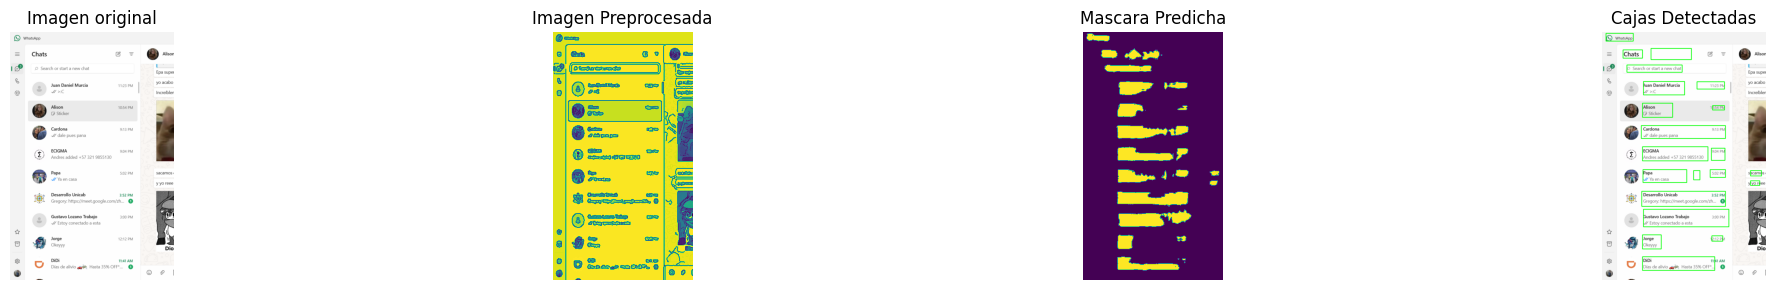

<Figure size 640x480 with 0 Axes>

In [ ]:

# Cargar imagen desde archivo
img_path = 'pruebas/image.png'  # Asegúrate de que la ruta sea correcta
img_bgr = cv2.imread(img_path)

# Instanciar detector
detector = TextDetector(
    model_path='out/rico/unet_binary/model/4_base_gray_canny(8000).keras',
    tolerance=3,
    min_box_area=25,
    canny_threshold=(5, 20)
)

# Procesar imagen
original, binary_mask, boxes_image, boxes_bounding = detector.process(img_bgr, advance_clustering=True)
pre_processed = detector.prepare(img_bgr)

# Convertir imágenes a RGB para visualización
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
# Convertir a (x,y,1)

boxes_image_rgb = cv2.cvtColor(boxes_image, cv2.COLOR_BGR2RGB)

print(original_rgb.shape, pre_processed.shape, binary_mask.shape, boxes_image_rgb.shape)
images_to_plot = [original_rgb, pre_processed, binary_mask, boxes_image_rgb]
name_of_the_plots = ["Imagen original", "Imagen Preprocesada", "Mascara Predicha", "Cajas Detectadas"]
plot_images_row(images_to_plot, name_of_the_plots, (24,3))
# Guardar imágenes
pre_processed_uint8 = (pre_processed.squeeze() * 255).astype('uint8') if pre_processed.max() <= 1 else pre_processed.squeeze().astype('uint8')
binary_mask_uint8 = (binary_mask * 255).astype('uint8') if binary_mask.max() <= 1 else binary_mask.astype('uint8')

cv2.imwrite('flow/red_neuronal/4.png', pre_processed_uint8)
cv2.imwrite('flow/red_neuronal/5.png', binary_mask_uint8)
Image.fromarray(boxes_image_rgb).save('flow/output/6.png')

plt.tight_layout()
plt.show()


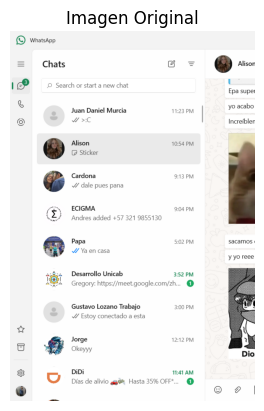

Procesando imagen pruebas/image.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


[ WARN:0@299.023] global loadsave.cpp:268 findDecoder imread_('pruebas/image.jpg'): can't open/read file: check file path/integrity
[ WARN:0@299.031] global loadsave.cpp:268 findDecoder imread_('pruebas/image.jpg'): can't open/read file: check file path/integrity
INFO:TextDetector:Recorte guardado en pruebas/image_0.png con texto: (© whatsapp
INFO:TextDetector:Recorte guardado en pruebas/image_1.png con texto: 
INFO:TextDetector:Recorte guardado en pruebas/image_2.png con texto: Chats
INFO:TextDetector:Recorte guardado en pruebas/image_3.png con texto: 2 Search or start a new chat
INFO:TextDetector:Recorte guardado en pruebas/image_4.png con texto: Juan Daniel Murcia
A >
INFO:TextDetector:Recorte guardado en pruebas/image_5.png con texto: 11:23 PM
INFO:TextDetector:Recorte guardado en pruebas/image_6.png con texto: Alison
G Sticker
INFO:TextDetector:Recorte guardado en pruebas/image_7.png con texto: 10:54 PM
INFO:TextDetector:Recorte guardado en pruebas/image_8.png con texto: Cardona 9

Caja: (14,5) → (128,39) | Texto OCR: (© whatsapp
Caja: (201,67) → (367,113) | Texto OCR: 
Caja: (86,73) → (166,107) | Texto OCR: Chats
Caja: (100,135) → (329,165) | Texto OCR: 2 Search or start a new chat
Caja: (166,203) → (339,258) | Texto OCR: Juan Daniel Murcia
A >
Caja: (390,204) → (507,234) | Texto OCR: 11:23 PM
Caja: (166,292) → (290,350) | Texto OCR: Alison
G Sticker
Caja: (442,302) → (507,320) | Texto OCR: 10:54 PM
Caja: (161,384) → (507,437) | Texto OCR: Cardona 9:13 PM
JW dale pues pana
Caja: (166,471) → (435,529) | Texto OCR: ECIGMA
Andres added +57 321 9855130
Caja: (449,477) → (505,527) | Texto OCR: 9:04 PM
Caja: (168,565) → (348,618) | Texto OCR: Papa
W Na en casa
Caja: (444,565) → (507,597) | Texto OCR: 5:02 PM
Caja: (376,569) → (402,607) | Texto OCR: 
Caja: (599,569) → (666,591) | Texto OCR: sacamos
Caja: (599,611) → (674,630) | Texto OCR: y yo reee
Caja: (163,654) → (507,716) | Texto OCR: Desarrollo Unicab 3:52 PM
Gregory: https://meet.google.com/zh... @
Caja: (166,728

In [9]:

plt.imshow(original)
plt.axis('off')
plt.title("Imagen Original")
plt.show()

ocr_results = detector.get_all_cuts("image", True)

for (x1, y1, x2, y2), text in ocr_results:
    print(f"Caja: ({x1},{y1}) → ({x2},{y2}) | Texto OCR: {text}")

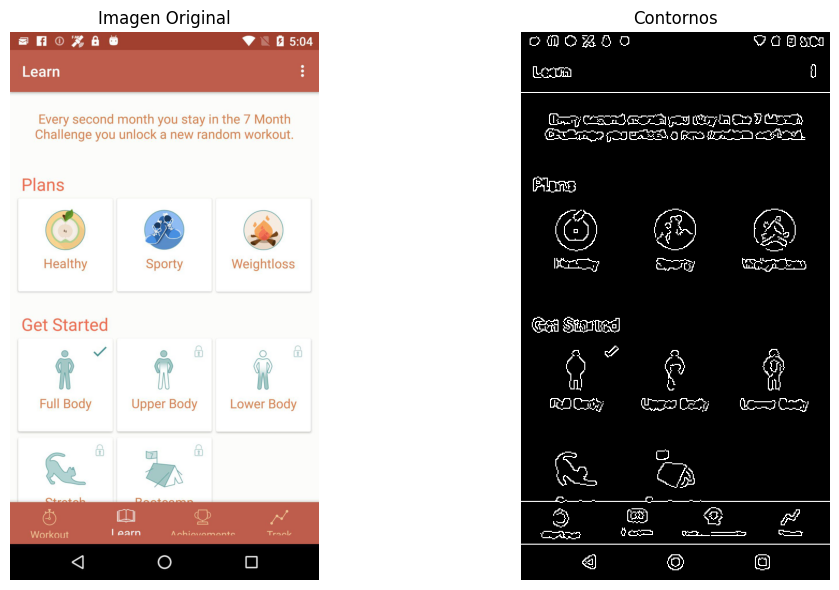

In [4]:
# 2) Resize + Canny
resized = cv2.resize(original, (288, 512))
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 1.4)
edges = cv2.Canny(gray, 50, 100)
_, bin_edges = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(bin_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Mostrar contornos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Contornos')
plt.axis('off')
plt.tight_layout()
plt.show()
